<a href="https://colab.research.google.com/github/suha98/Classification-of-Wine-Quality-using-SVMs-Grid-Hyperparameter-Tuning-and-Oversampled-Data/blob/main/SVM_Wine_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of Wine Quality using SVMs, Grid Hyperparameter Tuning, and Oversampled Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

#so that all columns of dataframe are shown
pd.set_option('display.max_columns', None)



In [ ]:
df = pd.read_csv('WineQT.csv')

### Functions

**Provides a brief overview of the data**

In [ ]:
#this function gives a summary of the data and a brief look at it as well

def look (data):
  print('The data has', len(data.columns), 'columns:', data.columns, '\n \n')
  print(data.head(), '\n \n')
  print(data.info(), '\n \n')
  print(df.describe(), '\n \n')

**Shows the correlations between the features and the output variable**

In [ ]:
#visualizing the correlation matrix to select the features that have the most relevance to the output column
def correlation(data):
  corrMatrix = df.corr(method = 'pearson')
  plt.figure(figsize = (10,10))
  sns.heatmap(corrMatrix, annot=True)


**Oversamples the minority class and undersamples the majority randomly to reduce imbalance**

In [ ]:
# Oversampling with SMOTE and random undersample from the majority class to reduce the data imbalance

def oversample(data_x, data_y):
  oversample = SMOTE()
  X, y = oversample.fit_resample(data_x, data_y)
  return X,y

**Splits the data into training and test sets**

In [ ]:
#os_bool is the variable I'm using to indicate whether or not to oversample. If it's True, then the data will be oversampled.

def split(features, output, os_bool):
  # Using .values gives the data as numpy arrays instead of a pandas dataframe
  if os_bool == True:
    X, y = oversample(features,output)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  else:
    # This splits the data into the train and test set. 20% of the data will be in the test set.
    X_train, X_test, y_train, y_test = train_test_split(features, output, test_size = 0.2, random_state = 0)
  return (X_train, X_test, y_train, y_test)

**Scales the data so that the model works on it better**

In [ ]:
def scale(X_train, X_test):
  # Feature scaling transforms the values into the range of 1 to -1. This makes it easier for the model to train.
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return (X_train, X_test)

**I used the gridsearch algorithm to train the svm model multiple times using different parameters**

In [ ]:
def grid_train(X_train, Y_train):
  # defining the parameter range
  param_grid = {'C': [0.1, 0.5, 0.75, 1, 1.5, 5, 10, 100, 100],
                'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf', 'linear']}
 
  grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
  # fitting the model for grid search
  grid.fit(X_train, y_train)
  return grid


**Getting the predictions from the model and it's performance**

In [ ]:
def grid_predict(grid, X_test, y_test):
  # print best parameter after tuning
  print(grid.best_params_)
 
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(X_test)

  # print classification report
  print(classification_report(y_test, grid_predictions))
  
  #print the correlation matrix 
  y_test = pd.Series(np.array(y_test), name = 'Test Values')
  y_pred = pd.Series(np.array(grid_predictions), name = 'Predicted Values')

  plt.figure(figsize = (10,10))
  sns.heatmap( pd.DataFrame(pd.crosstab(y_test, y_pred)), annot=True)
  plt.show()


### 1. Looking at the data

**From the dataset we can observe that:**

1.   There are no missing values, that is, cells that are empty or been filled with an irregular value like '-1' or 9999
2.   There are 11 columns of features and one output column that classifies the quality of the wine. One of the columns has the wine ID
3.   The dataset has a total of 1143 rows




In [ ]:
look (df)

The data has 13 columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object') 
 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0

**Class Imbalance**

There also very few instances of very poor (3/4) and very good (8) wine quality. Since the class is imbalanced the SVM algorithm may have more trouble classifying them.

Text(0.5, 0, 'Wine Quality')

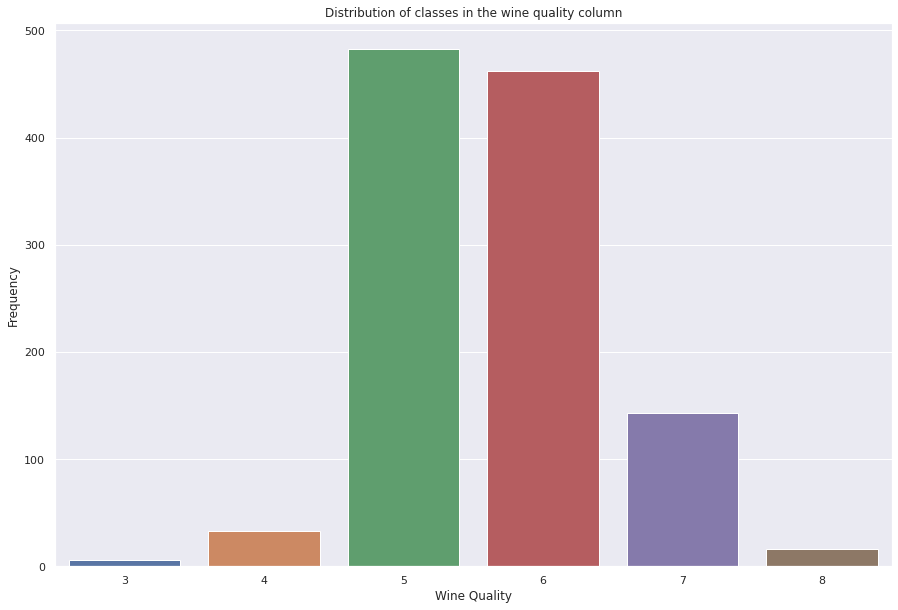

In [ ]:
quality = df.groupby('quality').size().reset_index().rename(columns={0:'Frequency'})

sns.set_theme()
plt.figure(figsize = (15,10))
plt.title('Distribution of classes in the wine quality column')
sns.barplot(data = quality, x ='quality', y='Frequency')
plt.xlabel('Wine Quality')

**Feature Selection** 

Since there are a lot of features, it's useful to see correlations first to find the relevant ones.

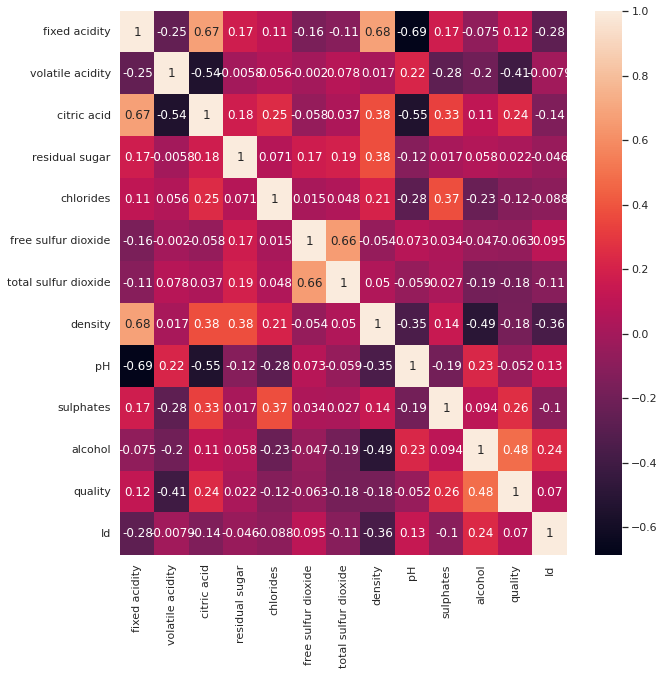

In [ ]:
correlation(df)

The free sulfur dioxide and ID column were not included as input features of the classifier.

In [ ]:
df = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides','total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'residual sugar', 'quality']]

## Implementation without oversampling

### 2. Splitting and scaling the data





In [ ]:
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,residual sugar,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,1.9,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8,2.6,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8,2.3,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8,1.9,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,1.9,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0,2.3,6
1139,6.8,0.620,0.08,0.068,38.0,0.99651,3.42,0.82,9.5,1.9,6
1140,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5,2.0,5
1141,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2,2.2,6


In [ ]:
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]

In [ ]:
X_train, X_test, y_train, y_test = split(X, y, False)
X_train, X_test = scale(X_train, X_test)

### Training with gridsearch

Using the Grid Search algorithm makes it easy to train the model with different values of C and gamma to find which one works best. I can also change the kernel function in this way. 

**Gamma:** Controls how far the influence of a single training parameter reached (low values means far). It is also said that gamma controls the curvature of the hyperplane 

**C**: The value of C controls the tradeoff between margin size and classification error. Larger values of C results smaller margins because SVM tried to reduce the number of misclassifications; smaller values mean bigger margins which lead to more classification error

In [ ]:
grid = grid_train(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.421 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.421 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.423 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.563 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.585 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.541 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.579 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.604 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.75, kernel=rbf;, score=0.443 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.75, kernel=rb

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=5, gamma=0.1)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.76      0.75       100
           6       0.60      0.70      0.65        92
           7       0.63      0.44      0.52        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.33      0.32      0.32       229
weighted avg       0.64      0.66      0.65       229



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


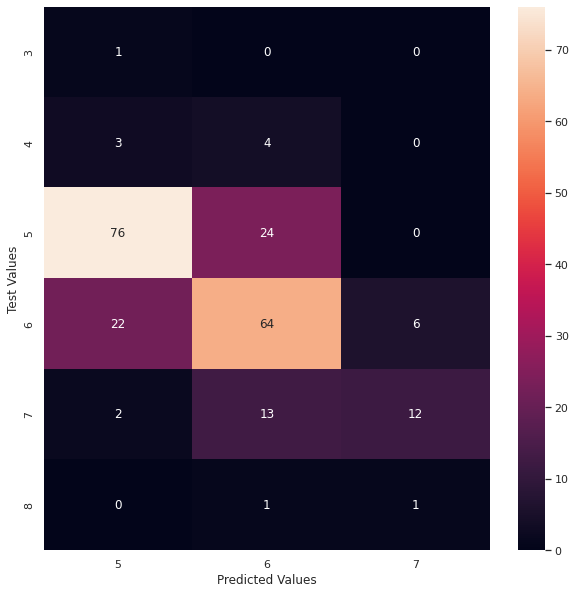

In [ ]:
grid_predict(grid, X_test, y_test)

## Implementation With Oversampling

### Splitting and scaling the data





In [ ]:
#In this case oversampling is true
X_train, X_test, y_train, y_test = split(X,y, True)
X_train, X_test = scale(X_train, X_test)

### Training with gridsearch

In [ ]:
grid = grid_train(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.644 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.599 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.634 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.659 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.670 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.648 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.75, kernel=rbf;, score=0.659 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.75, kernel=rb

{'C': 10, 'gamma': 0.75, 'kernel': 'rbf'}
SVC(C=10, gamma=0.75)
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        99
           4       0.94      0.95      0.94        79
           5       0.71      0.72      0.71        99
           6       0.69      0.64      0.67       103
           7       0.90      0.91      0.90       108
           8       0.95      1.00      0.97        92

    accuracy                           0.86       580
   macro avg       0.86      0.87      0.87       580
weighted avg       0.86      0.86      0.86       580



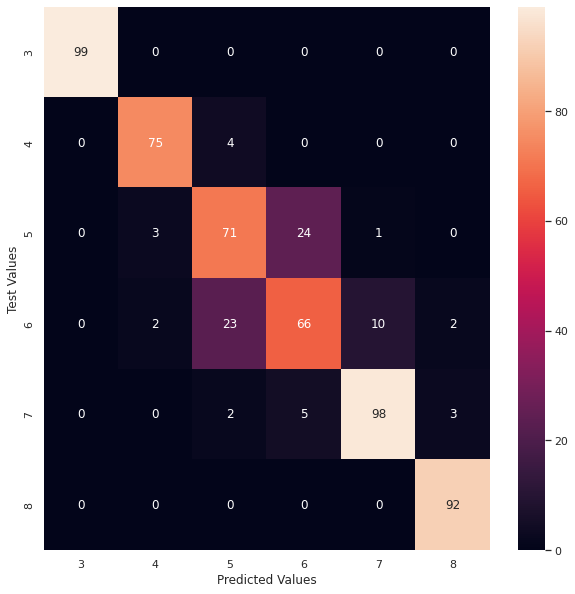

In [ ]:
grid_predict(grid, X_test, y_test)